In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:

with sqlite3.connect("../db.sqlite3") as conn:
    query = ("SELECT datetime, quantity, order_id, product_id, price, name "
             "FROM restaurant_order "
             "JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id "
             "JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id")
    df = pd.read_sql_query(query, conn)
df.to_csv("restaurant_data.csv", index=False)
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    74818 non-null  datetime64[ns]
 1   quantity    74818 non-null  int64         
 2   order_id    74818 non-null  int64         
 3   product_id  74818 non-null  int64         
 4   price       74818 non-null  float64       
 5   name        74818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ MB


,datetime,quantity,order_id,product_id,price,name
0,2019-08-03 20:25:00,2,1,6,0.80,Plain Papadum
1,2019-08-03 20:25:00,1,1,240,12.95,King Prawn Balti
2,2019-08-03 20:25:00,1,1,19,2.95,Garlic Naan
3,2019-08-03 20:25:00,1,1,36,3.95,Mushroom Rice
4,2019-08-03 20:25:00,1,1,111,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

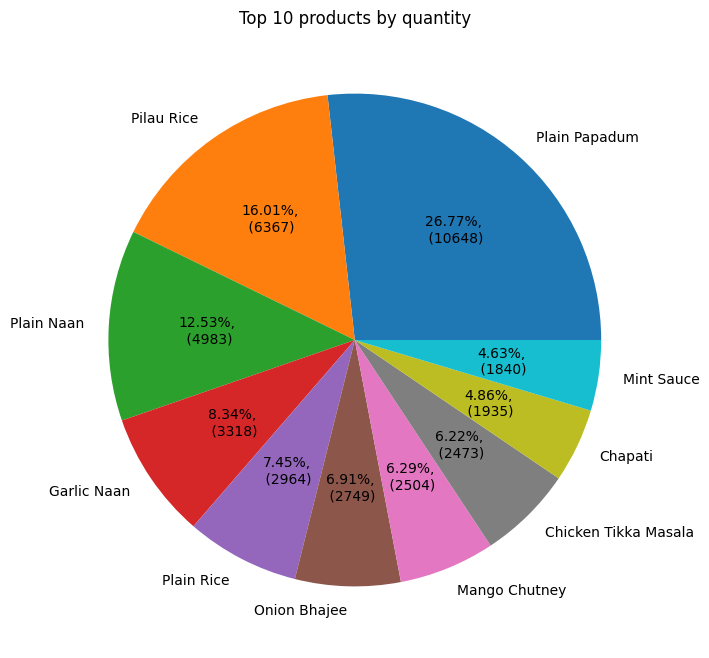

In [10]:
product_counts = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct=lambda p: f"{p:.2f}%,\n ({p*sum(product_counts)/100:.0f})")
plt.title("Top 10 products by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

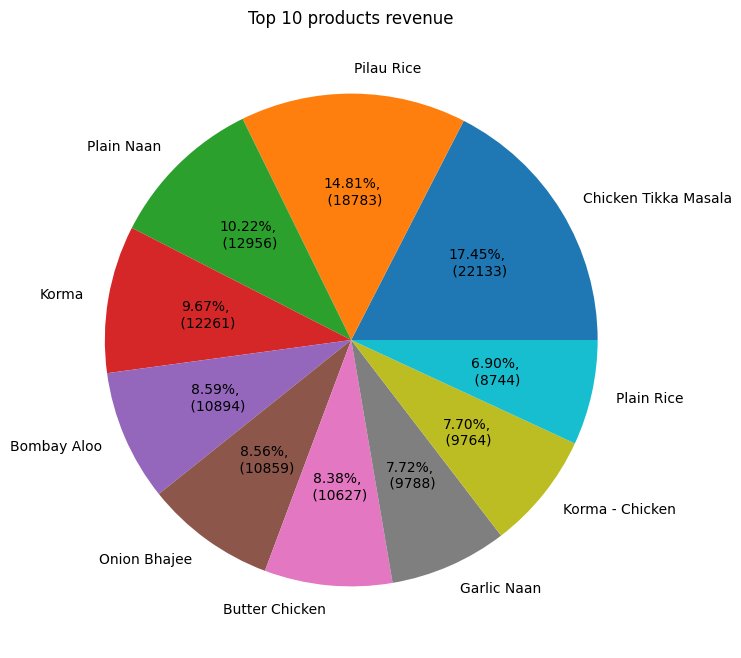

In [13]:
df["item_price"] = df["price"] * df["quantity"]
product_revenue = df.groupby("name")["item_price"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_revenue.index, autopct=lambda p: f"{p:.2f}%,\n ({p*sum(product_counts)/100:.0f})")
plt.title("Top 10 products revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

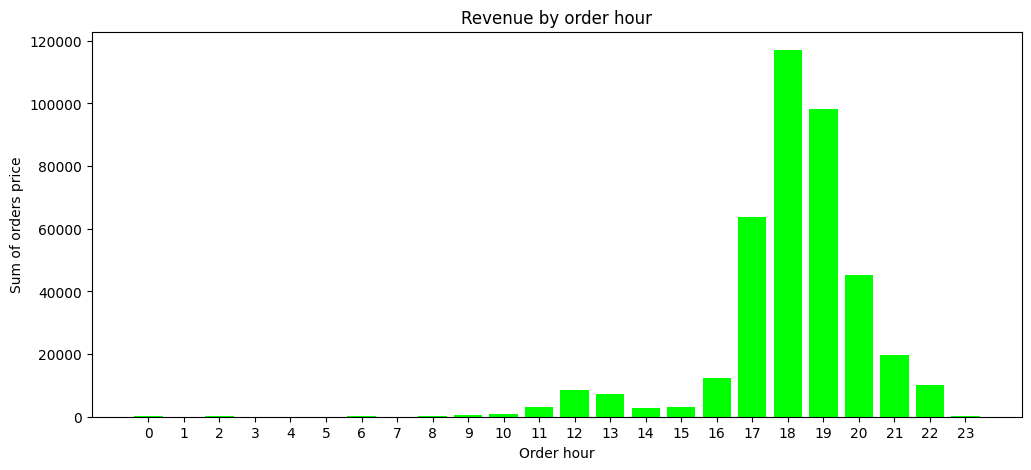

In [7]:
df["Order Hour"] = df["datetime"].dt.hour
sum_of_orders = df.groupby("Order Hour")["price"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(sum_of_orders.index, sum_of_orders, color="lime")
plt.title("Revenue by order hour")
plt.xlabel("Order hour")
plt.ylabel("Sum of orders price")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

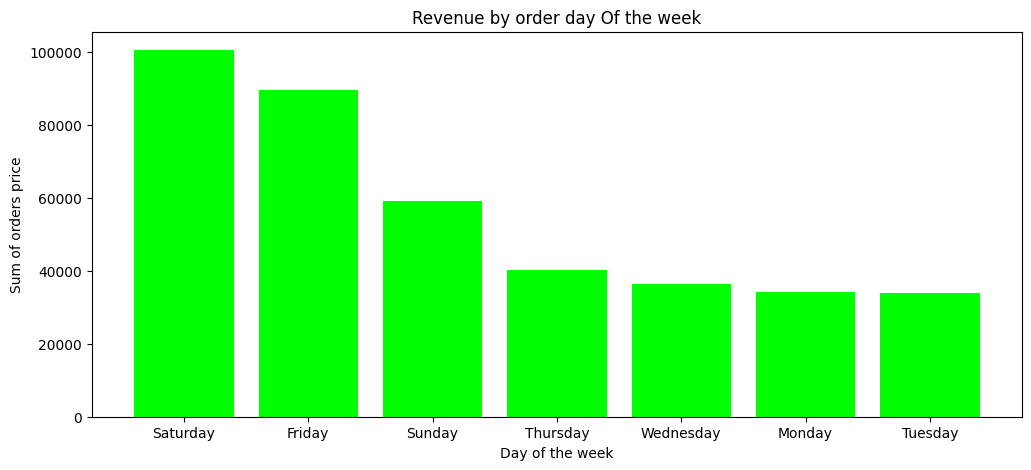

In [8]:
df["Order Day"] = df["datetime"].dt.day_name()
sum_of_orders = df.groupby("Order Day")["price"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(sum_of_orders.index, sum_of_orders, color="lime")
plt.title("Revenue by order day Of the week")
plt.xlabel("Day of the week")
plt.ylabel("Sum of orders price")
plt.show()